In [1]:
# n'exécuter qu'une fois
!pip3 install sympy numpy matplotlib


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


# Disques de Gershgorin

Avant d'aborder quelques algorithmes de calcul des valeurs propres d'une matrice, donnons une alternative pratique à ces algorithmes . Le théorème suivant  permet de localiser les valeurs propres dans des disques, dits disques de Gershgorin, du plan complexe.

```{margin} 
![](./images/gershgorinsemyon.png)
```

```{prf:theorem} Théorème de Gershgorin
Si on représente une matrice $A$ (ou toute matrice semblable à $A$) sous la forme $A=diag\{d_1\cdots d_n\}+F$, où $F$ est une matrice de diagonale nulle, alors le spectre de $A$ est contenu dans l'union des disques $D_i,1\leq i\leq n$ du plan complexe, tels que 

$D_i=\left \{ z\in \mathbb{C}, |z-d_i|\leq \displaystyle\sum_{j=1}^n|f_{ij}|\right \}$
```

```{index} Gershgorin;théorème
```






Une application intéressante de ce résultat est l'estimation des valeurs propres d'une matrice obtenue en perturbant une matrice dont on connaît le spectre.


```{prf:example}
$A =
\left[
\begin{array}{ccc}
1&0.1&-0.1\\
0&2&0.4\\
-0.2&0&3\\
\end{array}
\right]
$

dont les valeurs propres sont situées dans les disques suivants
$\begin{align*}
D_1&=\left \{ z\in \mathbb{C}, |z-1|\leq 0.2\right\}\\
D_2&=\left \{ z\in \mathbb{C}, |z-2|\leq 0.4\right\}\\
D_3&=\left \{ z\in \mathbb{C}, |z-3|\leq 0.2\right\}
\end{align*}$
```

Matrix([
[     0, 0.2447, 0.1923, 0.01071,  0.1419],
[0.4275,   -1.0, 0.3949,  0.8415, 0.07026],
[0.3588, 0.6129,    4.0,  0.3466,   0.698],
[0.3281, 0.8006, 0.4752,     1.0,  0.4855],
[0.4775, 0.1901, 0.9204,  0.6322,     7.0]])

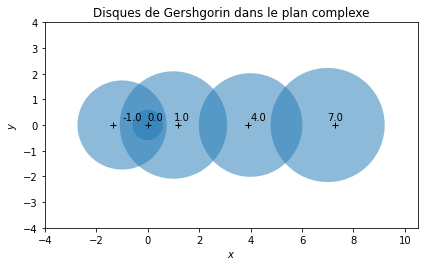

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix
n = 5 

D = np.diag([0, -1, 4 , 1 , 7 ])
M = np.random.rand(n, n) + D
for k in range(n):
  M[k][k] = D[k][k]

R = np.zeros(n) 
for i in range(n):
    R[i] = sum(abs(M[i,:])) - abs(M[i,i])

eigenvalues = np.linalg.eigvals(M)

fig, ax = plt.subplots()
for k in range(n):
    x, y = M[k,k].real, M[k,k].imag
    ax.add_artist( plt.Circle((x, y), R[k], alpha=0.5) )
    plt.plot(eigenvalues[k].real, eigenvalues[k].imag, 'k+')
    plt.text(D[k][k],0.2,str(M[k][k]))

ax.axis([-4, 10.5, -4, 4])
ax.set_aspect(1)    
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Disques de Gershgorin dans le plan complexe")
plt.tight_layout()
Matrix(M).evalf(4)